In [6]:
## Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from PIL import Image
from skimage import measure
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

import os

image_file = '/Users/Nicke/Desktop/hackthedinos/pteradata/ct_data/Zanabazar/8-Bit/TROODON/SLICES/CORONAL/COR530.TIF'

Populating the interactive namespace from numpy and matplotlib


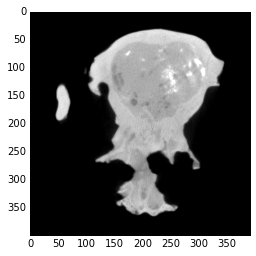

In [8]:
## Import Image
img = Image.open(image_file)
# img.show()

img_arr = np.array(img)

plt.imshow(img_arr, cmap=plt.cm.gray)

In [76]:
## Denoise settings
denoise_weight = 100

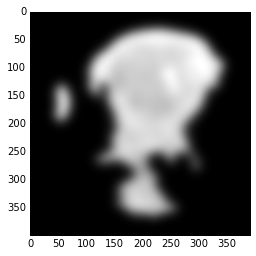

In [77]:
## Denoise image

img_arr2 = denoise_tv_chambolle(img_arr, weight=denoise_weight)
plt.imshow(img_arr2, cmap=plt.cm.gray)

In [78]:
## Contour finding settings
contour_level = .4 #Argument to find_contours
contour_thresh = 0 #Threshold to throw out contours shorter than thresh

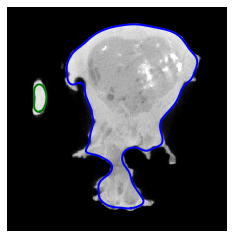

In [79]:
## Find contours
contours = measure.find_contours(img_arr2, contour_level)

large_contours = [x for x in contours if len(x) > contour_thresh]

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img_arr, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(large_contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()